## Applying NLP Techniques to Assess Comments and Obtain Statistics

### Objective: To write the required CSV files for future use and obtain Initial Sentence Level Statistics

### Importing Required Packages

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import Counter
import requests
import datetime

from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.sem import relextract

import re

### Uses of Various Lists in this code
#### List a for storing number of sentences of each comments
#### List b for storing storing pos tag of each word in the sentences
#### List c for storing the comment id in the order of occurrence
#### List d for storing the pos tag of sentences as sentence format itself
#### List helper is used for recording the sentence, the comment it is related to and the index of the sentence as in the order of being read
#### List sents contains the the tokenized sentences of each comment in one iteration
#### List text contains the words tokenized by nltk per comment
#### List all_sents contains all the sentences that have been tokenized by nltk
#### List pos_tagged_sent_without_BK contains all the pos_tagged sentences in d but without 'BK'
#### List comments contains all the comments alone
#### all_sent_without_BK contains all the sentences in all_sents but without 'BK'

### Note: BK is in the CSV file to preserve the Line Breaks which occur in comments

In [2]:
a = []
b = []
c = []
d = []
helper = []
csvfile = open('C:/Users/AshwinAmbal/Desktop/Intern_Final/Resources/Top_Level_Comment_Without_Removed.csv', 'r', encoding='utf8')
reader = csv.reader(csvfile, delimiter='|')
i=0
for row in reader:
    if i==0:
        i=i+1
        continue
    sents = sent_tokenize(row[2])
    for one_sent in sents:            
        helper.append([one_sent, row[0]])
    d = d + sents
    text = nltk.word_tokenize(row[2])
    a.append(len(sents))
    b = b + nltk.pos_tag(text)
    c.append(row[0])
all_sents = d
d = [nltk.word_tokenize(sent) for sent in d]
d = [nltk.pos_tag(sent) for sent in d]
csvfile.close()

pos_tagged_sent_without_BK = list()
for lister in d:
    pos_tagged_sent_without_BK.append([t for t in lister if not '[' in t[0] and not 'BK' in t[0] and not ']' in t[0]  ])

comments = list()
csvfile = open('C:/Users/AshwinAmbal/Desktop/Intern_Final/Resources/Top_Level_Comment_Without_Removed.csv', 'r', encoding='utf8')
reader = csv.reader(csvfile, delimiter='|')
i=0
for row in reader:
    if i==0:
        i=i+1
        continue
    comments.append(row[2])
csvfile.close()

all_sent_without_BK = list()
for sent in all_sents:
    all_sent_without_BK.append(sent.replace("[BK]", ""))

counter = 0
for row in helper:
    row.append(counter)
    counter+=1

### Writing a CSV File to Map Each Comment to a Sentence using the Index of the sentence as appearing in the order of being read

In [3]:
with open('C:/Users/AshwinAmbal/Desktop/Intern_Final/Resources/Sentence_Comment.csv', 'w', encoding='utf8', newline = '') as f:
    writer = csv.writer(f, delimiter = '|')
    writer.writerows(helper)

### Writing a CSV File to save the content of Sentences with Mappings of index numbers

In [4]:
f = open('C:/Users/AshwinAmbal/Desktop/Intern_Final/Resources/Sentence_Original.csv', 'w', encoding='utf8', newline = '')
file = open('C:/Users/AshwinAmbal/Desktop/Intern_Final/Resources/Sentence_Without_BK.csv', 'w', encoding='utf8', newline = '')
writer = csv.writer(f, delimiter = '|')
write = csv.writer(file, delimiter= '|')
for sent1, sent2 in zip(all_sents, all_sent_without_BK):
    writer.writerow([sent1, counter])
    write.writerow([sent2, counter])
f.close()

### Writing Only the Top Comments Content Alone without it's Attributes

In [7]:
with open("C:/Users/AshwinAmbal/Desktop/Intern_Final/Resources/Top_Comments_Content_Alone.csv", "w",encoding = 'utf8',newline = '') as f:
    writer = csv.writer(f, delimiter='|')
    for element in comments:
        writer.writerow([element])

## Analysis Part....

### Finding Time Stamps of Comments

In [8]:
tstamp = list()
csvfile = open('C:/Users/AshwinAmbal/Desktop/Intern_Final/Resources/Top_Level_Comment_Without_Removed.csv', 'r', encoding='utf8')
reader = csv.reader(csvfile, delimiter='|', quotechar='"')
i=0
for row in reader:
    if i==0:
        i=i+1
        continue
    tstamp.append(row[3])
csvfile.close()

### Monthly Distribution

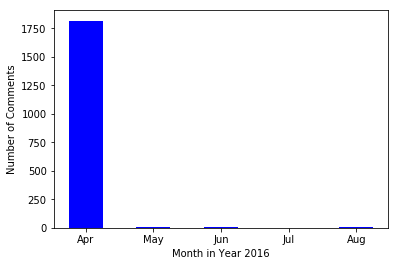

In [11]:
jan = feb = mar = apr = may = jun = jul = aug = sep = octt = nov = dec = 0
for t in tstamp :
    date = datetime.datetime.fromtimestamp(
            int(t)
        ).strftime('%m')
    if date == '01':
        jan = jan + 1
    elif date == '02':
        feb = feb + 1
    elif date == '03':
        mar = mar + 1
    elif date == '04':
        apr = apr + 1
    elif date == '05':
        may = may + 1
    elif date == '06':
        jun = jun + 1
    elif date == '07':
        jul = jul + 1
    elif date == '08':
        aug = aug + 1
    elif date == '09':
        sep = sep + 1
    elif date == '10':
        octt = octt + 1
    elif date == '11':
        nov = nov + 1
    elif date == '12':
        dec = dec + 1

x = list(range(10000))
dates = list()
datename = list()
dates.extend((jan,feb,mar,apr,may,jun,jul,aug,sep,octt,nov,dec))
datename.extend(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.xticks(x, datename)
width = 0.5
plt.bar(x[3:8], dates[3:8], width, color="blue")
plt.xlabel('Month in Year 2016')
plt.ylabel('Number of Comments')
plt.show()

### Weekly Distribution

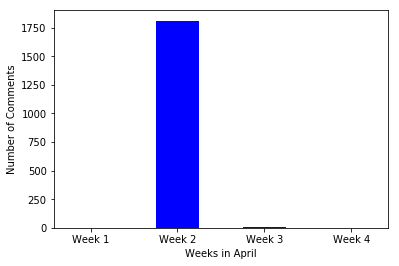

In [13]:
w1 = w2 = w3 = w4 = 0
for t in tstamp :
    date = datetime.datetime.fromtimestamp(
            int(t)
        ).strftime('%m')
    if date == '04' :
        date = datetime.datetime.fromtimestamp(
            int(t)
        ).strftime('%d')
        if(int(date) <= 7 and int(date) > 0):
            w1 = w1 + 1
        elif(int(date) <= 14 and int(date) > 7):
                w2 = w2 + 1
        elif(int(date) <= 21 and int(date) > 14):
                w3 = w3 + 1
        elif(int(date) <= 30 and int(date) > 21):
                w4 = w4 + 1

x = list(range(1900))
dates = list()
datename = list()
dates.extend((w1,w2,w3,w4))
datename.extend(('Week 1','Week 2','Week 3','Week 4'))
plt.xticks(x, datename)
width = 0.5
plt.bar(x[0:4], dates[0:4], width, color="blue")
plt.xlabel('Weeks in April')
plt.ylabel('Number of Comments')
plt.show()

### Daily Distribution

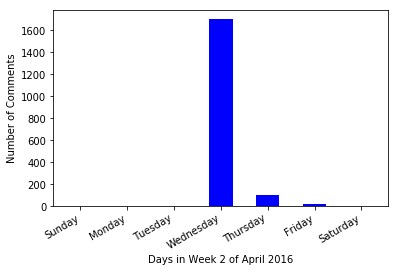

In [17]:
sun = mon = tue = wed = thu = fri = sat = 0
dates = list()
for t in tstamp :
    date = datetime.datetime.fromtimestamp(
            int(t)
        ).strftime('%m')
    if date == '04' :
        date = datetime.datetime.fromtimestamp(
            int(t)
        ).strftime('%d')
        if(int(date) <= 14 and int(date) > 7):
            if int(date) == 8:
                sun = sun + 1
            elif int(date) == 9:
                mon = mon + 1
            elif int(date) == 10:
                tue = tue + 1
            elif int(date) == 11:
                wed = wed + 1
            elif int(date) == 12:
                thu = thu + 1
            elif int(date) == 13:
                fri = fri + 1
            elif int(date) == 14:
                sat = sat + 1               

x = list(range(1900))
dates = list()
datename = list()
dates.extend((sun,mon,tue,wed,thu,fri,sat))
datename.extend(('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
plt.xticks(x, datename)
width = 0.5
plt.bar(x[0:7], dates[0:7], width, color="blue")
plt.xlabel('Days in Week 2 of April 2016')
plt.ylabel('Number of Comments')
fig = plt.figure(1)
fig.autofmt_xdate()
plt.show()

### Hourly Distribution

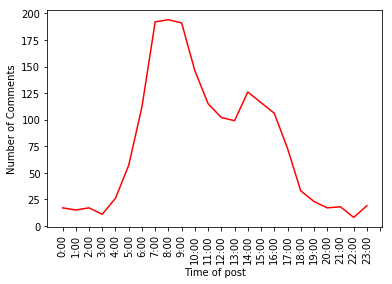

In [18]:
date = list()
count = list()
time = list()
for t in tstamp :
    date.append(datetime.datetime.fromtimestamp(
            int(t)
        ).strftime('%H'))
timename = ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00',
          '16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00',]
y=Counter(date)
y = sorted(y.items())
time = [t[0] for t in y]
count = [t[1] for t in y]
plt.xlabel('Time of post')
plt.ylabel('Number of Comments')
plt.xticks(x, timename,rotation='vertical')
plt.plot(time, count,color = 'red')
plt.show()

## Simple Count Statistics of Comments and Sentences per Comment

In [19]:
print("Maximum number of sentences: ",max(a))

Maximum number of sentences:  146


In [20]:
print("Minimum number of sentences: ",min(a))

Minimum number of sentences:  1


In [21]:
print("Average number of sentences per comment: ",sum(a)/len(a))

Average number of sentences per comment:  6.973267866884888


### Top Seven Comments with Maximum Number of Sentences  

In [22]:
a, c = (list(t) for t in zip(*sorted(zip(a, c),reverse=True)))

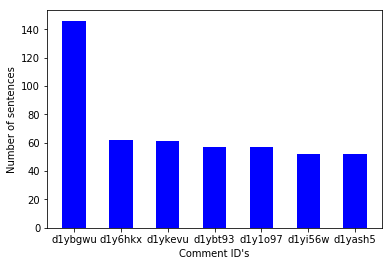

In [23]:
x = list(range(1907))
plt.xticks(x, c)
width = 0.5
plt.bar(x[:7], a[:7], width, color="blue")
plt.xlabel('Comment ID\'s')
plt.ylabel('Number of sentences')
plt.show()

### Meaning of tags

In [24]:
nltk.help.upenn_tagset("WP$")

WP$: WH-pronoun, possessive
    whose


### Sequence of bigram words and the distribution of the Tags of words coming before or after 'TO'

In [25]:
for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(b):
    if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
        print(w1, w2, w3) 

trained to provide
designed to give
trying to find
deserve to take
going to be
want to live
attempted to hang
tried to get
start to go
like to come
need to read
trying to imagine
try to be
having to sift
going to remember
going to care
tried to kill
tried to kill
wanted to go
had to leave
starting to hallucinate
trying to make
began to worry
going to type
tried to fight
want to live
need to look
went to bed
bed to die
want to join
proving to be
struggling to become
proved to be
going to kill
do to help
hesitate to message
lost to suicide
be to slip
decided to pack
have to kill
expect to wake
trying to kill
gon na die
do to make
decided to rush
rush to work
needed to cross
cross to get
have to witness
went to get
deciding to use
start to level
had to fight
embarrassing to talk
want to talk
accepted to study
tried to do
begin to understand
expecting to go
went to sleep
wanted to watch
was to take
choose to take
chose to take
decided to hang
decided to do
took to convince
managed to get
w

want to die
supposed to be
left to go
have to live
seems to be
having to look
led to insomnia
left to remember
tried to remember
needed to do
going to say
bear to hurt
come to live
commit to dying
wanted to get
want to be
decided to get
thought to myself
want to take
decided to stop
try to hold
going to be
started to kick
have to go
tried to kill
want to die
want to experience
going to bring
came to myself
came to myself
is to short
short to be
suited to be
try to slowly
going to bother
going to be
have to live
have to get
had to make
chose to forgo
like to have
going to be
had to take
need to continue
continue to take
going to kill
came to check
used to tell
go to sleep
went to work
had to leave
wanted to see
tried to kill
going to kill
mean to write
have to read
tried to do
tried to overdose
have to go
go to work
tried to keep
had to get
trying to kill
go to sleep
tried to commit
want to return
trying to find
having to call
seemed to believe
needed to get
seem to be
is to try
try to 

was to leave
was to leave
was to throw
going to work
wanted to go
tried to drown
tried to haul
wanting to go
decided to try
managed to throw
attempted to give
used to talk
have to face
trying to end
wanted to call
tried to hang
had to drink
manage to kill
waiting to die
going to die
lived to be
going to explain
wanting to see
had to vomit
want to do
going to play
want to go
trying to get
tried to kill
wanting to do
want to die
have to go
go to work
deserve to be
going to go
go to sleep
getting to know
start to make
continues to develop
want to die
going to do
waiting to get
tried to do
tried to hang
talking to myself
want to die
went to math
go to bed
wanted to end
going to be
wanted to stop
need to fucking
wanted to be
wants to hold
wanting to die
have to deal
going to sound
have to think
wanted to die
wanted to die
wanted to go
wanted to die
wanted to die
trying to keep
have to go
go to fucking
want to wake
threatened to kill
supposed to see
go to therapy
try to focus
try to silence


### All Words, their Tags and the Counts of the occurrence of tags after 'Suicide'

In [27]:
q = []
tags = [c[1] for (a, c) in nltk.bigrams(b) if a[0] == 'suicide']
q = [c[0] for (a, c) in nltk.bigrams(b) if a[0] == 'suicide']
fd = nltk.FreqDist(tags)
fd.tabulate()
for word,tag in zip(q,tags):
    print(word,tag)

 NN   .  IN   ,  CC  RB NNS VBZ  DT PRP VBD  JJ  MD VBP  ''   : WRB  CD   (  TO  VB JJS JJR 
 78  43  36  30  26  25  24  18   9   7   6   5   4   4   3   3   3   2   2   1   1   1   1 
can MD
I PRP
. .
is VBZ
; :
do VBP
, ,
. .
now RB
was VBD
opportunist NN
about IN
. .
is VBZ
, ,
is VBZ
. .
, ,
, ,
story NN
in IN
are VBP
was VBD
and CC
just RB
attempt NN
I PRP
, ,
but CC
once RB
attempts NNS
again RB
. .
when WRB
almost RB
. .
cocktail NN
always RB
is VBZ
victims NNS
plan NN
attempt NN
off IN
. .
attempts VBZ
failures NNS
often RB
note NN
note NN
, ,
. .
by IN
note NN
and CC
. .
, ,
, ,
was VBD
attempts NNS
attempt NN
attempt NN
is VBZ
. .
a DT
had VBD
several JJ
just RB
attempts NNS
, ,
would MD
after IN
attempt NN
. .
this DT
survivor NN
research NN
attempt NN
attempt NN
, ,
. .
since IN
. .
, ,
attempts NNS
and CC
was VBD
ever RB
right RB
, ,
attempt NN
is VBZ
most JJS
so IN
, ,
survivor NN
. .
attempt NN
. .
all DT
and CC
. .
prevention NN
or CC
prevention NN
is VBZ
. .
watch NN


### All Words, their Tags and the Counts of the occurrence of tags before 'Suicide'

In [26]:
q = []
tags = [a[1] for (a, c) in nltk.bigrams(b) if c[0] == 'suicide']
q = [a[0] for (a, c) in nltk.bigrams(b) if c[0] == 'suicide']
fd = nltk.FreqDist(tags)
fd.tabulate()
for word,tag in zip(q,tags):
    print(word,tag)

  IN   VB   JJ   DT  VBD PRP$  VBN  VBG   TO  VBP   RB   CC   CD   NN   ''  VBZ    ,  NNS   RP  NNP    )  WRB  JJR 
  59   41   39   36   33   28   28   16   10    8    5    5    4    3    3    3    2    2    2    2    1    1    1 
of IN
of IN
to TO
quantum JJ
to TO
contemplating VBG
considering VBG
attempt VB
commit VB
of IN
a DT
attempted VBD
my PRP$
since IN
commit VB
like IN
then RB
attempted VBD
considering VBG
a DT
commit VB
) )
but CC
at IN
to TO
a DT
actual JJ
plan VBP
attempted JJ
attempted VBD
unsuccessful JJ
about RB
by IN
attempting VBG
about IN
and CC
the DT
is VBZ
that IN
to TO
specific JJ
10th CD
took VBD
committing VBG
the DT
n't RB
about IN
my PRP$
a DT
attempt VBP
commit VB
attempted VBD
my PRP$
attempted VBD
attempt VB
attempted VBD
attempted VBD
about IN
two CD
my PRP$
next JJ
, ,
at IN
attempted VBN
although IN
attempted VBN
commit VB
approach VB
commit VB
my PRP$
attempted VBD
her PRP$
commit VB
attempted VBD
a DT
shitty JJ
failed VBD
my PRP$
committing VBG
attemp

### List of all Verbs

In [28]:
verb = list()
for e in b:
    if e[1] == "VBG" :
        verb.append(e)
count_verb = list(Counter(verb).items())
sorted(count_verb, key=lambda x: x[1],reverse = True)[:5]
verb

[('going', 'VBG'),
 ('feeling', 'VBG'),
 ('coping', 'VBG'),
 ('overwhelming', 'VBG'),
 ('suffering', 'VBG'),
 ('making', 'VBG'),
 ('trying', 'VBG'),
 ('crying', 'VBG'),
 ('going', 'VBG'),
 ('using', 'VBG'),
 ('struggling', 'VBG'),
 ('hanging', 'VBG'),
 ('dressing', 'VBG'),
 ('running', 'VBG'),
 ('crashing', 'VBG'),
 ('coming', 'VBG'),
 ('realising', 'VBG'),
 ('reading', 'VBG'),
 ('Agonizing', 'VBG'),
 ('being', 'VBG'),
 ('reading', 'VBG'),
 ('watching', 'VBG'),
 ('trying', 'VBG'),
 ('Hoping', 'VBG'),
 ('having', 'VBG'),
 ('expressing', 'VBG'),
 ('apologizing', 'VBG'),
 ('feeling', 'VBG'),
 ('fucking', 'VBG'),
 ('kidding', 'VBG'),
 ('being', 'VBG'),
 ('going', 'VBG'),
 ('going', 'VBG'),
 ('fleeting', 'VBG'),
 ('having', 'VBG'),
 ('embarrassing', 'VBG'),
 ('staying', 'VBG'),
 ('thinking', 'VBG'),
 ('giving', 'VBG'),
 ('standing', 'VBG'),
 ('doing', 'VBG'),
 ('embarrassing', 'VBG'),
 ('going', 'VBG'),
 ('starting', 'VBG'),
 ('tripping', 'VBG'),
 ('trying', 'VBG'),
 ('putting', 'VBG'),
 ('

### List of all Nouns

In [29]:
noun = list()
for e in b:
    if e[1] in ("NN") and len(e[0])>1:
        noun.append(e)
count_noun = list(Counter(noun).items())
sorted(count_noun, key=lambda x: x[1],reverse = True)[:50]


[(('time', 'NN'), 732),
 (('life', 'NN'), 631),
 (('day', 'NN'), 416),
 (('hospital', 'NN'), 411),
 (('thought', 'NN'), 274),
 (('way', 'NN'), 274),
 (('thing', 'NN'), 257),
 (('something', 'NN'), 243),
 (('attempt', 'NN'), 232),
 (('family', 'NN'), 226),
 (('suicide', 'NN'), 213),
 (('lot', 'NN'), 205),
 (('mom', 'NN'), 199),
 (('school', 'NN'), 191),
 (('pain', 'NN'), 183),
 (('anything', 'NN'), 180),
 (('night', 'NN'), 179),
 (('someone', 'NN'), 172),
 (('depression', 'NN'), 171),
 (('friend', 'NN'), 166),
 (('home', 'NN'), 165),
 (('anyone', 'NN'), 159),
 (('everything', 'NN'), 155),
 (('help', 'NN'), 150),
 (('year', 'NN'), 148),
 (('bed', 'NN'), 140),
 (('room', 'NN'), 139),
 (('head', 'NN'), 139),
 (('shit', 'NN'), 139),
 (('point', 'NN'), 136),
 (('fuck', 'NN'), 132),
 (('everyone', 'NN'), 128),
 (('work', 'NN'), 120),
 (('car', 'NN'), 117),
 (('nothing', 'NN'), 116),
 (('dad', 'NN'), 115),
 (('one', 'NN'), 113),
 (('moment', 'NN'), 110),
 (('person', 'NN'), 110),
 (('week', 'N

### List of all Adjectives

In [30]:
adjectives = list()
for e in b:
    if e[1] in ("JJ") and len(e[0])>1:
        adjectives.append(e)
count_adjectives = list(Counter(adjectives).items())
sorted(count_adjectives, key=lambda x: x[1],reverse = True)[:50]

[(('first', 'JJ'), 471),
 (('few', 'JJ'), 265),
 (('much', 'JJ'), 248),
 (('next', 'JJ'), 236),
 (('good', 'JJ'), 183),
 (('alive', 'JJ'), 180),
 (('bad', 'JJ'), 176),
 (('last', 'JJ'), 169),
 (('other', 'JJ'), 133),
 (('little', 'JJ'), 125),
 (('many', 'JJ'), 124),
 (('sure', 'JJ'), 117),
 (('long', 'JJ'), 114),
 (('happy', 'JJ'), 109),
 (('same', 'JJ'), 105),
 (('hard', 'JJ'), 101),
 (('whole', 'JJ'), 98),
 (('able', 'JJ'), 97),
 (('only', 'JJ'), 97),
 (('glad', 'JJ'), 95),
 (('dead', 'JJ'), 93),
 (('own', 'JJ'), 93),
 (('high', 'JJ'), 87),
 (('second', 'JJ'), 83),
 (('old', 'JJ'), 75),
 (('mental', 'JJ'), 75),
 (('different', 'JJ'), 74),
 (('real', 'JJ'), 71),
 (('stupid', 'JJ'), 69),
 (('suicide', 'JJ'), 69),
 (('suicidal', 'JJ'), 68),
 (('right', 'JJ'), 65),
 (('conscious', 'JJ'), 64),
 (('sad', 'JJ'), 60),
 (('several', 'JJ'), 55),
 (('new', 'JJ'), 52),
 (('full', 'JJ'), 51),
 (('angry', 'JJ'), 51),
 (('great', 'JJ'), 49),
 (('worth', 'JJ'), 48),
 (('sick', 'JJ'), 48),
 (('wrong'

### Counter to count the number of occurences of words with particular POS Tags in comments

In [31]:
count1 = list(Counter(b).items())   # List 'b' contains all the 
sorted(count1, key=lambda x: x[1],reverse = True)

[(('I', 'PRP'), 13428),
 (('.', '.'), 11458),
 ((',', ','), 7399),
 (('to', 'TO'), 6087),
 (('and', 'CC'), 6069),
 (('the', 'DT'), 5694),
 (('BK', 'NNP'), 4881),
 (('was', 'VBD'), 4467),
 ((']', 'NNP'), 4457),
 (('my', 'PRP$'), 4131),
 (('a', 'DT'), 4130),
 (('not', 'RB'), 3134),
 (('of', 'IN'), 3071),
 (('it', 'PRP'), 2676),
 (("''", "''"), 2539),
 (('[', 'NNP'), 2373),
 (('in', 'IN'), 2313),
 (('me', 'PRP'), 2305),
 (('that', 'IN'), 1541),
 (("'", "''"), 1510),
 (('for', 'IN'), 1494),
 (('had', 'VBD'), 1425),
 (('is', 'VBZ'), 1362),
 (('am', 'VBP'), 1289),
 (('but', 'CC'), 1279),
 (('on', 'IN'), 1143),
 (('just', 'RB'), 1089),
 (('with', 'IN'), 1084),
 (('up', 'RP'), 1071),
 (('did', 'VBD'), 1033),
 (('have', 'VBP'), 1003),
 (('would', 'MD'), 989),
 (('you', 'PRP'), 950),
 (('at', 'IN'), 915),
 (('this', 'DT'), 896),
 (('[', 'VB'), 848),
 (('be', 'VB'), 822),
 (('myself', 'PRP'), 798),
 (('that', 'DT'), 787),
 (('so', 'RB'), 756),
 (('time', 'NN'), 732),
 (('[', 'JJ'), 696),
 (('stil

### Getting the tags from sentences and counting number of times the sequence of tags occur in all sentences

In [32]:
tag_order_sent = list()
tag_order = list()
i = 0
for sentence in pos_tagged_sent_without_BK:
    tag_order = []
    for element in sentence:
        tag_order = tag_order + [element[1]]
    tag_order_sent.append(tag_order)

In [33]:
tuples = [tuple(l) for l in tag_order_sent]
count2 = list(Counter(tuples).items())
sorted(count2, key=lambda x: x[1],reverse=True)[:100]

[(('NNP', '.'), 53),
 ((), 35),
 (("''",), 34),
 (('NN', '.'), 33),
 (('``',), 29),
 (('POS', '.'), 21),
 (('PRP', 'VBD', 'RB', 'JJ', '.'), 19),
 (('PRP', 'VBD', '.'), 16),
 (('RB', '.'), 15),
 (('PRP', 'VBD', 'JJ', '.'), 15),
 (('PRP', 'VBD', 'RB', '.'), 10),
 (('NNP', 'NN', '.'), 10),
 (('NNS', '.'), 10),
 (('NN',), 10),
 (('PRP', 'VBD', 'NN', '.'), 10),
 (('RB', 'RB', '.'), 10),
 (('CD', '.'), 9),
 (('DT', 'NN', '.'), 7),
 (('RB', 'VBN', '.'), 7),
 (('IN', 'DT', 'NN', '.'), 7),
 (('PRP', 'VBD', 'CD', '.'), 7),
 (('PRP', 'VBP', 'VBN', '.'), 7),
 (('DT', 'VBD', 'CD', 'NNS', 'RB', '.'), 6),
 (('PRP', 'VBP', 'PRP', '.'), 6),
 (('PRP', 'VBD', 'RB', 'RB', '.'), 6),
 (('PRP', 'VBD', 'VBN', '.'), 6),
 (('PRP', 'VBD', 'PRP', '.'), 6),
 (('PRP', 'VBD', 'DT', 'NN', '.'), 6),
 (('POS', '.', "''", "''", "''"), 6),
 (('DT', 'JJ', 'NN', '.'), 6),
 (('PRP', 'VBD', 'DT', 'JJ', 'NN', '.'), 6),
 (('RB', 'JJ', 'NN', '.'), 6),
 (('.',), 6),
 (('PRP', 'MD', 'RB', 'VB', '.'), 5),
 (('JJ', 'NN', '.'), 5),


### Function to find the sequence of words that satisfy a given POS Tag Sequence

In [43]:
def pos_seq_to_sent_seq(tags, sent_to_find):
    tag_order = list()
    i = 0
    for sentence in sent_to_find:
        tag_order = []
        for element in sentence:
            tag_order = tag_order + [element[1]]
        if tags == tag_order:
            for element in sentence:
                print(element[0], end=" ")
            print("\n")

In [49]:
tags = ['PRP', 'VBD', 'RB', 'JJ', '.']
pos_seq_to_sent_seq(tags, pos_tagged_sent_without_BK)

It was just awful . 

I was so stuck . 

I was so upset . 

I felt so weak . 

I was so ready . 

it was really scary . 

I felt so sick . 

It was very emotional . 

I was honestly mad . 

I felt really high . 

It was just horrible . 

We got really serious . 

It was very loud . 

I was really apathetic . 

It was so embarrassing . 

He was really nice . 

He was literally hysterical . 

I was extremely disappointed . 

It was not easy . 



In [44]:
tags = ['PRP', 'VBD', 'CD', '.']
pos_seq_to_sent_seq(tags, pos_tagged_sent_without_BK)

I was 12 . 

I was 13 . 

I was 15 . 

I was 15 . 

I was 16 . 

I was 17 . 

It was 10AM . 



In [37]:
tags = ['PRP', 'VBP', 'PRP', '.']
pos_seq_to_sent_seq(tags, pos_tagged_sent_without_BK)

I hung myself . 

I love you . 

I am me . 

I love him . 

I meant it . 

I hate myself . 



In [38]:
tags = ['PRP', 'VBD', 'VBN', '.']
pos_seq_to_sent_seq(tags, pos_tagged_sent_without_BK)

I felt embarrassed . 

I felt loved . 

I had failed . 

I was fucked . 

I was embarrassed . 

I was pissed . 



In [41]:
tags = ['PRP', 'VBD', 'RB', '.']
pos_seq_to_sent_seq(tags, pos_tagged_sent_without_BK)

I was right . 

I tried twice . 

I was numb . 

I tried twice . 

It was over . 

I guess not . 

I failed again . 

It misfired twice . 

He was not . 

I had not . 



In [45]:
tags = ['NNP', 'NN', '.']
pos_seq_to_sent_seq(tags, pos_tagged_sent_without_BK)

Immense guilt . 

NEVER surrender . 

Perfect opportunity . 

Utter disappointment . 

Proper lashing . 

Fuck everything . 

No catharsis . 

Throwaway account . 

Thanks everyone . 

Fuck sake . 



In [46]:
tags = ['DT', 'VBD', 'CD', 'NNS', 'RB', '.']
pos_seq_to_sent_seq(tags, pos_tagged_sent_without_BK)

That was eight years ago . 

This was seven years ago . 

This happened 4 months ago . 

This was 10 years ago . 

This was 2 years ago . 

That was 20 years ago . 



### All Sentences in which a Cardinal Number Occurs

In [48]:
for sentence in pos_tagged_sent_without_BK:
    tag_order = []
    flag = 0
    for element in sentence:
        if element[1] == 'CD':
            for element in sentence:
                print(element[0], end=" ")
            print("\n")
            break

The doctor , two therapists , and a nurse assured me that my family and friends would not hate me or be angry . 

I was 12 . 

Well I had attempted to hang myself when I was 15 . 

I hit the ground and just yelled out loud 'OH FUCK ' '' because 1 . 

The belt broke and I was still here , and 2 . 

As for what happened to the people who bullied me , one is in jail and the other is up to be a CEO . 

I can remember being six or seven and reading articles on tensions in the middle east ( like those are new ! ) 

I went to the beach one afternoon and decided it was just time to be done with it . 

'Fuck , This is embarrassing ' '' I tried to kill myself on the 1st of February this year , I am currently staying in University halls , the way I tried to kill myself was just to down a bunch of alcohol . 

I drank a full bottle of wine , three bottles of cider , two beers in the space of about 10 minutes . 

I hoped that if I drank them fast enough ( I am only 5 ' '' 2 and about 120 pounds . ) 

I find it strange the first post I saw was this one : Ironically enough on April 9th ( just a couple days ago ) marked it a year since my attempt . 

' '' My first attempt was with two full bottles of Tylenol . 

I woke up in my room like 18 hours later . 

I stayed curled up in the corner of my bed for another full 24 hours until the hallucinations stopped . 

I am ashamed to say it ( and honestly I have never told anyone ) , but I have tried a total of 26 times to kill myself . 

Three years since my last attempt , and I am proud to say I am glad I am not normal . 

'shit , man I feel fucked up ' '' , only in spanish . 

Like a really strange hangover times 1000 . '' 

It took two people ( the flatmate helped ) to pull clothes on me , then drag me to the local Emergency Department . 

That echoed through the next five hours being watched by the beady eyes of three no-nonsense orderlies , who did not hesitate in almost literally sitting on me when I was caught trying again while the n

Four years later , I am back in college and aiming to finish well this time , have an adorable dog who is the bedrock of my emotional stability , and am in a supportive and healthy relationship with my SO who I had a massive crush on for years and who saw me at my worst those years ago and still wants me ( and is wonderfully validating of the progress I have made ) . 

I tried to overdose on about 400mg of concerta ( its an amphetamine like adderall . 

The maximum amount someone my body weight should have taken was 150mg . ) 

I became one of the best highschool wrestlers in NYC . 

Here 's a copy of the post I made two weeks after the attempt : Two weeks ago I had a kind of good day but for some reason I decided to end it all that Wednesday . 

Woke up , tried to fight the nurse , police came in , cuffed me , they gave me a sedative and 15 hours later I woke up . 

My mother passed away 13 years ago and my dad and stepmother divorced after five years of marriage . 

Ive been off meds

So , this was.. Two years ago . 

It was right after thanksgiving dinner with my family ( I had been feeling like shit for weeks and holidays are always worse ) and we got home around 7ish , sisters and mom left for shopping a half hour later , so a couple minutes after they had left I grabbed my meds ( I was taking 5 different pills and if I remember correctly I was consuming about 1050-1075mg of meds a day ) and I poured a few into my hand ( the largest was 500mg and the smallest was like.. 15mg I think ) and I downed them . 

I woke up around 1am and my first thought was 'god damnit.. better clean this mess up before they get home . ' '' 

Forty minutes later they were home and not a single one knew what happened , they still do not . 

That was not my first attempt , my first was in 4th grade when I thought it was possible to choke myself to death '' 

I went to the hospital to see my niece who was only 8 hours old and just holding that little girl made me want to live . 

It 's be

Have n't finished a year of school in two years , and now I am trying to get my shit together , and figure out why I am on this earth , and what I should do . 

I was 15 at the time , the week after I was in the psychiatric ward . 

I turned 16 when I was in there . 

I am only 21 , but after a traumatic childhood and the revelation months earlier before my suicide attempt that I was Bipolar , I did not want to be there anymore . 

This happened 4 months ago . 

I remember getting up at one point and going to the bathroom against the doctors orders . 

Here I am , 8 years later , now going to therapy and finally recovering . 

Im still going through highs and lows , but its been about 4 years since my last attempt . 

It has been one of the hardest things we have gone through together . 

If you dont like your therapist , try a new one that may fit your needs better . 

' '' - DuB ( 20 $ ak ) '' 

When I was about 16 I decided to take every pill in the house . 

Some 75 advil , a packa

It 's been 4 years now , and while I still have major issues with the neurodegenerative illness , I have never had sleepwalking problems again since stopping my prescription for the drug . 

**TL ; DR : ** My initial thoughts before knowing I would be okay were a feeling of being in a totally surreal place and disconnected from life ... and then that transitioned into very 'in the moment ' thoughts and feelings when I learned I was not successful . 

I took sixteen pills of 50 mg Sertraline , four pills of 0.5 mg Lorazepam ( Ativan ) , a can of redbull , a bottle of prescription cough medicine ( Codeine ) , and alcohol . 

I was a 21 year-old Asian girl and just weighed a little over 100 lbs . 

At one point she asked me why I was crying and all I could respond was ' '' I do not know . ' '' 

My three days spent at the hospital were full of lies straight through my teeth and I somehow managed to convince the stream of staff members that I do not need any more medication and counseling 

And I will never truly know 100 % so maybe I am crazy. `` 

I have five fingers on this hand , two plus two equal four . 

i am a single 36 year old adult , and i still can not fully come to grips with the fact that nobody gives a shit if i am here or not except for my parents . 

'Fuck , I am such a disappointment ' '' . 

I ended up taking 4 vials of insulin and a sleeping pill to make it look like an accident but I make noises when my blood sugar is low when asleep . 

'The one fucking time they use the furthermost tracks to go that direction ... ' '' Anyway , I had finally had enough . 

The tracks were only a half mile away from my house , and about 200 or so feet down the road on the tracks became entirely shrouded due to trees and whatnot . 

Now , here '' s the thing , there are three sets of tracks . 

I waited between the first and second ones , and saw a train coming from about 3 miles away ( it may be surrounded by trees , but it is a straight shot and I can see the light )

Turns out not being a boyscout paid off , the knot at the loop came undone and all I could think was 'I can not even fucking kill myself properly ' Almost attempt came 3 months later while in counseling and under near 24 hour surveillance from my family or any authority figures cause my parents had seen the cuts on my arms . 

Something minor had set me off , probably something girl related ( my girlfriend at the time was also severely depressed , loved her to death , and we helped each other at times but overall we were just straight bad for one another ) So I decided that it was not worth everything , I decided to sneak out and hang myself in the middle of the night ( I had a fixation with this way as the summer prior my best friend hung himself , and I was not smart enough for the right pills ) The thing that changed my mind was remembering that friends mom at his funeral service . 

That was one of three attempts , all of them being very similar . 

Went to the hospital after being

I was unconscious hanging with a rope around my neck for 7 minutes , my mom walked in early from work and found me . 

She called 911 , got recesitated 3 minutes later since an ambulance was down the street for an epileptic man . 

'Fuck , are my parents here ? ' '' 

I was parked in a lot near this beatiful park I would grown up next to at like 3 AM . 

I fight my depression by making myself sad , listening to music I know will trigger me and thinking about the day I found out my son 's mother cut her own throat the way I was about to my own ( two years later I found out , it broke me ) . 

Point of my ramble is that I am glad I got help , I am glad I have the strength to not stab my co-workers and to not hurt that puppy , I am glad I have people that care about me , even if the devil on my shoulder tries his hardest to convince me no one cares . 

Fight your devil 's with kindness so that one day , someone will save you from yourself . 

That or it is because it is 5am . 

Born in 92

Eventually my grandma showed me , by now I had drank my 4 bottles of charcoal and puked several times . 

serious after many different attempts since my child/teen years I nearly succeeded at hanging myself in the closet 5 years ago . 

And I was disappointed that all my depression and one moment of extreme weakness lead to nearly erasing myself from existence . 

Two of the times it was , 'How the fuck am I still alive and how the fuck did I not vomit all those pills back up ? ' '' 

i can not even get this right ' '' This was my final attempt a few years ago , when one of my friends found me , and told me that if I ever did this again and managed it , she would follow me , because I was the only good thing in her life back then . 

I have been planning and wanting to die for the most part of 4 years now . 

Over 800 now ... 

( 21 ) 

She ended up getting 5150 'd and they released her the next day , did not pump her stomach either . 

I do remember her being very upset , angry , and 

All I had to do was slide the sharp metal a mere 2 or 3 inches between my ribs , easier than cutting a steak , and I could not do it . 

I was 14 when I figured that out . 

I can not drown , I have been swimming in alligator-infested waters and they did not come near me , I have been within 12 feet of wild bull moose and grizzlies and yet I am untouched , I have been shot at and I have put myself in harm 's way so much ... Just by existing . 

But I am a stubborn one . 

'Damn , I can not kill myself . ' '' '' 

My first attempt was when I jumped from the 2nd floor balcony when I was 6 . 

Second attempt was when I tried to smash my head against the wall at age 8 . 

18 months later I still feel suicidal at times , but I have managed to twist the thoughts . 

'Keep trying . ' '' 

First I tried using a steak knife to saw through my wrist which was a very slow blood flow so that was fail number one . 

One girl told me I suck at life so much I cant even kill myself . 

I have a decent 

I was 22 , and I had gone through a reasonably harsh breakup . 

I went on that way for three years with severe depression and self-harm with frequent thoughts of suicide . 

The day I started to love myself was just one month ago . 

There was one time which I describe as the worst moments of my life , I had reached my lowest point and before I did anything I met two important people . 

My first thoughts were very unclear because I was still under the influence of several hundred pills - including a month 's worth of Ambien . 

I was 18 at the time . 

This was in 2013 . 

Because I was probably slipping in and out of consciousness for a while , and I do not know how 'conscious ' '' one of the most memorable parts could be considered . 

But it is incredibly sharp in my mind.I remember I was absolutely certain that there were two other people in the room with me . 

And one of them told me that they could not do that ... that I had to save myself . 

Ineffectively attempted to overdo

A set of deep brown eyes in a round face , a small child about 6 looking at me , smiling , with long brown hair tumblng all over , laughing as she clutched this small white stuffed rabbit . 

I had one job and I fucked up . 

30 seconds go by and I begin to feel pain , 60 seconds and my face is turning red , 2 minutes the pain is becoming unbearable . 

3 minutes , 4 minues I break . 

I think if I can lick up even one pill I will die . 

I have attempted 17 times . 

I have been taking medications for the past 19 months , seeing a psychologist and phychiatrist monthly . 

When you are in a suicidal and major depressive state remember that whatever circumstances you are going through can be resolved or taken care of in one form or another . 

Not only do you have to find a medication that works well for you , with minimal to zero side effects , you have to get the right dosage . 

You might have to try upwards of 10 medications , and perhaps even combinations . 

I woke up in a hospita

My best friend and I were victims of physical , emotional and verbal bullying and it ended up with both of us self harming and I took about 15 Panadol pills ( the only medicine we had left from all the times I faked sick to avoid school ) . 

It did not do much except knock me out ( my first thought after I woke up was 'why am I still here ' ) and leave me dizzy for the next 48 hours . 

I am 16 now and I am 6 months clean after I realised how useless self harm is , and also as someone who is into Marilyn Manson and avenged sevenfold and stuff like that I got called Emo a lot and people would mimick cutting and stuff and it motivated me to stop . 

When I was 13 I tried to overdose . 

That attempt was exactly one year ago , and I have change my life tremendously . 

Edit : I should add , that was about 20 years ago . 

'How am I getting back ? ' '' 

The six hours it took for me to dig it out gave me enough time to sober up and realize I needed help . 

'my friend would be sad if i di

Only two or three people actually know what happened with why I was wearing hoodies in summer . 

I wish that it would have worked out the two times I tried or the two times I went in knowing I would try . 

Over 2k people tried to commit suicide by jumping from the golden gate bridge , 20 survived . 

Of the 20 that survived ALL OF THEM said the same thing I did 'I regret this decision ' '' ( http : //www.cosmopolitan.com/lifestyle/news/a50606/kevin-hines-golden-gate-suicide-survivor-video/ ) . 

Five attempts . 

After every time : 'God FUCKING damnit why did not I FINISH THE FUCKING JOB ' '' and then massive amounts of crying and usually puking . 

Six months later and she still 'jokes ' '' about it and I now have permanent stomach damage . '' 

'Everyone will be so disappointed in me ' '' Because I would not have tried if I did not think everyone I loved secretly wanted me dead , but was too good a person to ever admit it to themselves . 

I spent the next 3 days at home , i refuse

Just kill me ... . he lived to fight another day and still had all of his limbs ... No idea what became of him but he was only about 12 or 13 years old ... Was in school uniform and all ... shocking thing to experience 

When I was 13 I took a handful of sleeping pills , cut my wrists and got in a bath . 

That was 15 years ago. `` 

edit first time 12 years old . 

7 years later . 

When I was 13 years old , I tied a loose rope around my neck and tore it around a doornob . 

'I failed.. ' '' I also had part of my conscious self that told me it was a relief I was still breathing , but for weeks I would continue to find ways to try and end my life . 

'Fuck this . 

-- I had planned a subsequent attempt , however , was talking to a friend ( an internet friend back in 1997 ... someone in another state , who I had never met ) about my failed attempt and me wanting to do another attempt . 

I was 15 and tried to overdose on pain medication . 

I am 17 now , my first attempt was at 16 , it 

### Named Entity Recognition from POS Tagged Words

In [50]:
def extract_entity_names(t):
    entity_names = []
    if hasattr(t, 'label') and t.label:
        if t.label() == 'NE' or t.label() == 'PERSON' or t.label() == 'ORGANIZATION' or t.label() == 'LOCATION' or t.label() == 'GPE' or t.label() == 'FACILTY' or t.label() == 'GSP' or t.label() == 'DATE' or t.label() == 'TIME' or t.label() == 'MONEY':
            tup = (' '.join([child[0] for child in t] ),t.label())
            entity_names.append(tup)
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child))     
    return entity_names

In [51]:
chunked_sentences = nltk.ne_chunk_sents(pos_tagged_sent_without_BK)
entity_names = []
for tree in chunked_sentences:    
    entity_names.extend(extract_entity_names(tree))

In [52]:
count_entity = list(Counter(entity_names).items())
sorted(count_entity, key=lambda x: x[1],reverse = True)

[(('Fuck', 'GPE'), 57),
 (('Edit', 'GPE'), 29),
 (('ICU', 'ORGANIZATION'), 25),
 (('Life', 'GPE'), 24),
 (('ER', 'ORGANIZATION'), 24),
 (('Shit', 'GPE'), 19),
 (('Please', 'GPE'), 14),
 (('Woke', 'GPE'), 14),
 (('Sorry', 'PERSON'), 14),
 (('Anyway', 'GPE'), 14),
 (('Don', 'GSP'), 13),
 (('FUCK', 'ORGANIZATION'), 12),
 (('Got', 'GPE'), 12),
 (('Was', 'GPE'), 11),
 (('Suicide', 'GPE'), 11),
 (('Reddit', 'GPE'), 11),
 (('Dad', 'GPE'), 10),
 (('PTSD', 'ORGANIZATION'), 10),
 (('Part', 'GPE'), 10),
 (('Long', 'GPE'), 9),
 (('God', 'PERSON'), 9),
 (('Second', 'GPE'), 8),
 (('Took', 'GPE'), 8),
 (('No', 'GPE'), 8),
 (('Nobody', 'GPE'), 8),
 (('Tylenol', 'GPE'), 8),
 (('Didn', 'GPE'), 8),
 (('Wow', 'GPE'), 7),
 (('Which', 'GPE'), 7),
 (('Nothing', 'GPE'), 6),
 (('Shit', 'PERSON'), 6),
 (('Christmas', 'PERSON'), 6),
 (('Damn', 'GPE'), 6),
 (('Mother', 'PERSON'), 6),
 (('Anyways', 'GPE'), 6),
 (('OD', 'ORGANIZATION'), 6),
 (('Good', 'GPE'), 6),
 (('THE', 'ORGANIZATION'), 6),
 (('Haven', 'GPE'), 5

### Context Extraction between the Named Entities in the same sentence:

In [55]:
temp = list()
related = list()
chunked_sentences = nltk.ne_chunk_sents(pos_tagged_sent_without_BK)
i = 0
for tree in chunked_sentences:
    temp = nltk.sem.relextract.tree2semi_rel(tree)
    relation = nltk.sem.relextract.semi_rel2reldict(temp, window=10, trace=False)
    related = related + relation    
related

[defaultdict(str,
             {'filler': ',/, the/DT ungodly/RB vivid/JJ memories/NNS of/IN the/DT smell/NN of/IN rot/NN and/CC the/DT way/NN the/DT skin/NN of/IN the/DT water/NN logged/VBD bodies/NNS slopped/VBD off/RP in/IN my/PRP$ hand/NN while/IN I/PRP was/VBD deployed/VBN to/TO',
              'lcon': 'The/DT chaos/NN of/IN war/NN while/IN I/PRP was/VBD in/IN',
              'objclass': 'GSP',
              'objsym': 'new_orleans',
              'objtext': 'New/NNP Orleans/NNP',
              'rcon': 'for/IN',
              'subjclass': 'GPE',
              'subjsym': 'iraq',
              'subjtext': 'Iraq/NNP',
              'untagged_filler': ', the ungodly vivid memories of the smell of rot and the way the skin of the water logged bodies slopped off in my hand while I was deployed to'}),
 defaultdict(str,
             {'filler': 'time/NN ,/, after/IN consuming/VBG all/PDT the/DT',
              'lcon': '',
              'objclass': 'GPE',
              'objsym': 'nytol',
    

In [56]:
IN = re.compile(r'.*\b\b.*')
chunked_sentences = nltk.ne_chunk_sents(d)

for doc in chunked_sentences:
        for rel in relextract.extract_rels('PERSON', 'ORGANIZATION', doc, corpus='ace', pattern=IN):
            print(relextract.rtuple(rel) )

[PER: 'Lawson/NNP House/NNP'] ')/) and/CC moved/VBN into/IN a/DT' [ORG: 'Medium/NNP Term/NNP']
